In [1]:
import pandas as pd 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from dataset_cluster_xgb import make_dataset
from os.path import join

In [167]:
train_path = join('jeju_data', 'train_new.parquet')
test_path = join('jeju_data', 'test_new.parquet')

X, y, test = make_dataset(train_path, test_path)

Start time:  2022-10-26 12:44:54.683660
Train dataset success !
Test dataset success !
End time: 2022-10-26 12:46:40.472611
Play time:  0:01:45.788951


In [169]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [170]:
model = XGBRegressor(tree_method='gpu_hist', gpu_id=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
mean_absolute_error(y_val, y_pred)

3.817299619021243

In [151]:
def make_cluster(train, test):
    from sklearn.cluster import KMeans
    train_c = train[['start_latitude', 'start_longitude']]
    test_c = test[['start_latitude', 'start_longitude']]
    
    k_mean = KMeans(n_clusters=4, init='k-means++')
    train['cluster'] = k_mean.fit_predict(train_c)
    test['cluster'] = k_mean.predict(test_c)
    
    return train, test    

In [177]:
df = X.copy()

<AxesSubplot:xlabel='start_latitude', ylabel='start_longitude'>

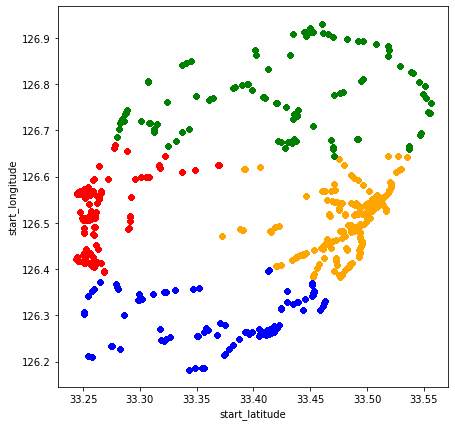

In [180]:
def make_scatter(df):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(7,7))

    df_temp=df[df['cluster']==0]
    df_temp.plot.scatter(x='start_latitude',y='start_longitude',ax=ax,color='RED')

    df_temp=df[df['cluster']==1]
    df_temp.plot.scatter(x='start_latitude',y='start_longitude',ax=ax,color='Orange')

    df_temp=df[df['cluster']==2]
    df_temp.plot.scatter(x='start_latitude',y='start_longitude',ax=ax,color='Green')

    df_temp=df[df['cluster']==3]
    df_temp.plot.scatter(x='start_latitude',y='start_longitude',ax=ax,color='Blue')